In [0]:
# Use GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive

In [0]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/')
os.getcwd()

'/content/drive/My Drive'

In [0]:
#import library
import pandas as pd
import numpy as np
from glob import glob
import fnmatch
import cv2
import time
import os 
start_time = time.time()

In [0]:
from os import listdir
from cv2 import imread

import matplotlib.pyplot as plt



import matplotlib as mpl

In [0]:

base_path = "/content/drive/My Drive/IDC_regular_ps50_idx5/"
folder = listdir(base_path)
len(folder)

279

In [0]:

def get_cancer_dataframe(patient_id, cancer_id):
    path = base_path + patient_id + "/" + cancer_id
    files = listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe

def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df

In [0]:
path = base_path + "10253" + "/" + "0"
files = listdir(path)
dataframe = pd.DataFrame(files, columns=["filename"])
path_names = path + "/" + dataframe.filename.values
dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
len(files)

479

In [0]:
def visualise_breast_tissue(patient_id):
    pass

In [0]:
example = "10253"

example_df = get_patient_dataframe(example)
max_point = [example_df.y.max()-1, example_df.x.max()-1]
grid = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)

broken_patches = []
for n in range(len(example_df)):
    try:
        image = imread(example_df.path.values[n])

        x_start = example_df.x.values[n] - 1
        y_start = example_df.y.values[n] - 1
        x_end = x_start + 50
        y_end = y_start + 50

        grid[y_start:y_end, x_start:x_end] = image
     
        #mask[y_start:y_end, x_start:x_end] = np.ones(shape=(50,50,3))
    except ValueError:
        broken_patches.append(example_df.path.values[n])



In [0]:
min_point = [example_df.y.min(), example_df.x.min()]
min_point

[101, 151]

In [0]:
example_df.head()

example_df.to_pickle("patient10253_coordinate.pkl")

In [0]:
from pandas import api 
from pandas.api import types 
from pandas.api.types import is_numeric_dtype


In [0]:
is_numeric_dtype(example_df['target'])
data = example_df[['x','y', 'target']] 
data.head()

,x,y,target
0,1001,1001,0
1,1001,1151,0
2,1001,1551,0
3,1001,1201,0
4,1001,1301,0


No handles with labels found to put in legend.


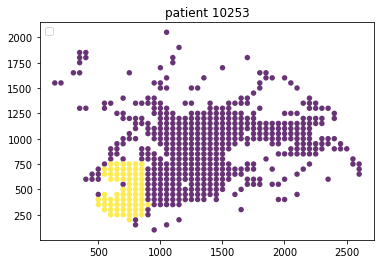

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from  matplotlib.pyplot import scatter

x=example_df['x']
y=example_df['y']
data = example_df[['x','y', 'target']]
colors = ("grey", "red")
groups = ("0","1")

# Create plot
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y, alpha=0.8, edgecolor='none', s=30, c=data.target )
#for data, color, group in zip(data, colors, groups):
# x,y=data
#  ax.scatter(x, y, alpha=0.8, c=colors, edgecolor='none', s=30, label=group)

plt.title('patient 10253')
plt.legend(labels=groups)
plt.legend(loc=2)
plt.show()


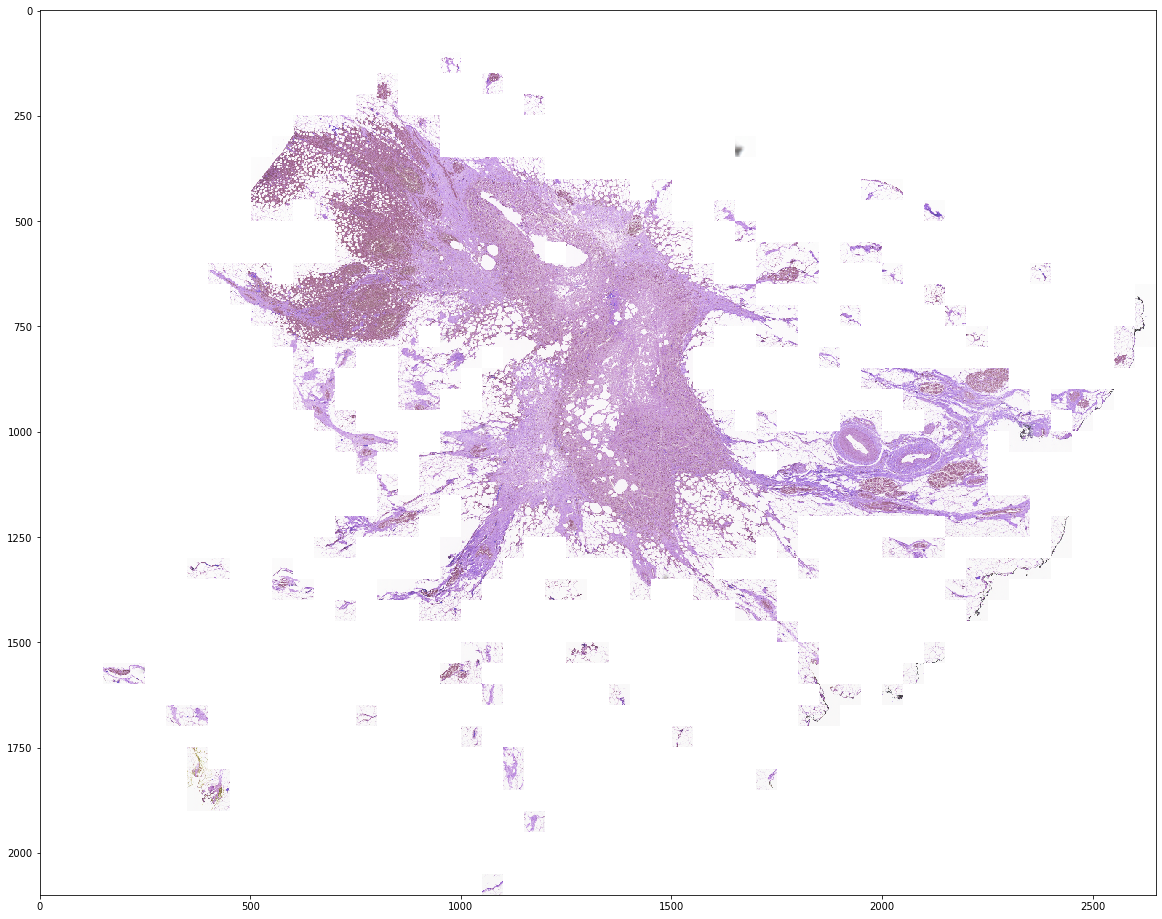

In [0]:

plt.figure(figsize=(20,20))
plt.imshow(grid, cmap="Blues", vmin=150, alpha=0.8)
plt.grid(False)